## Test 1

This test is to establish a baseline for how well the model can detect the presence of a person anywhere in an image. The original categories were recompiled into "populated" and "unpopulated" sets of images, the former having 1,116 examples and the latter having 1,055. These images have undergone no human selection or processing on our end; we will make a note of it if this changes in future testing.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

bs = 64

In [3]:
path = Path("data/preliminary_two_class")
classes = ["populated", "unpopulated"]

In [4]:
np.random.seed(5150)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
                                 ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

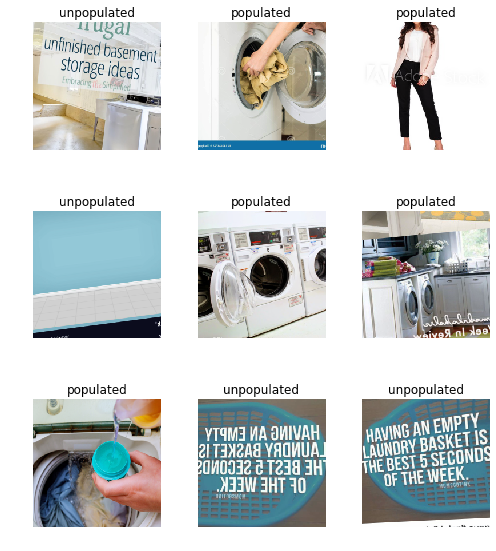

In [5]:
data.show_batch(rows=3, figsize=(7,8))

In [6]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [7]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.390330,0.256912,0.092807,00:56
1,0.286519,0.234318,0.092807,00:47
2,0.241864,0.241557,0.088167,00:47
3,0.207735,0.231891,0.085847,00:47


In [8]:
learn.save("test_1-1")
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


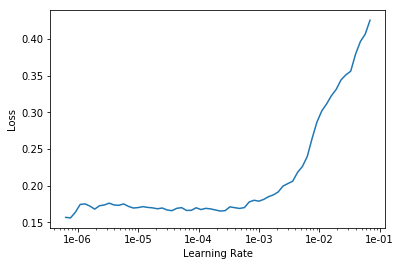

In [9]:
learn.recorder.plot()

In [10]:
learn.fit_one_cycle(4, max_lr=slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.168210,0.237222,0.078886,00:48
1,0.143504,0.239640,0.085847,00:47
2,0.114761,0.230882,0.076566,00:48
3,0.090089,0.216661,0.078886,00:48


In [11]:
learn.save("test_1-2")
learn.freeze()

In [12]:
data2 = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=448, num_workers=4).normalize(imagenet_stats)

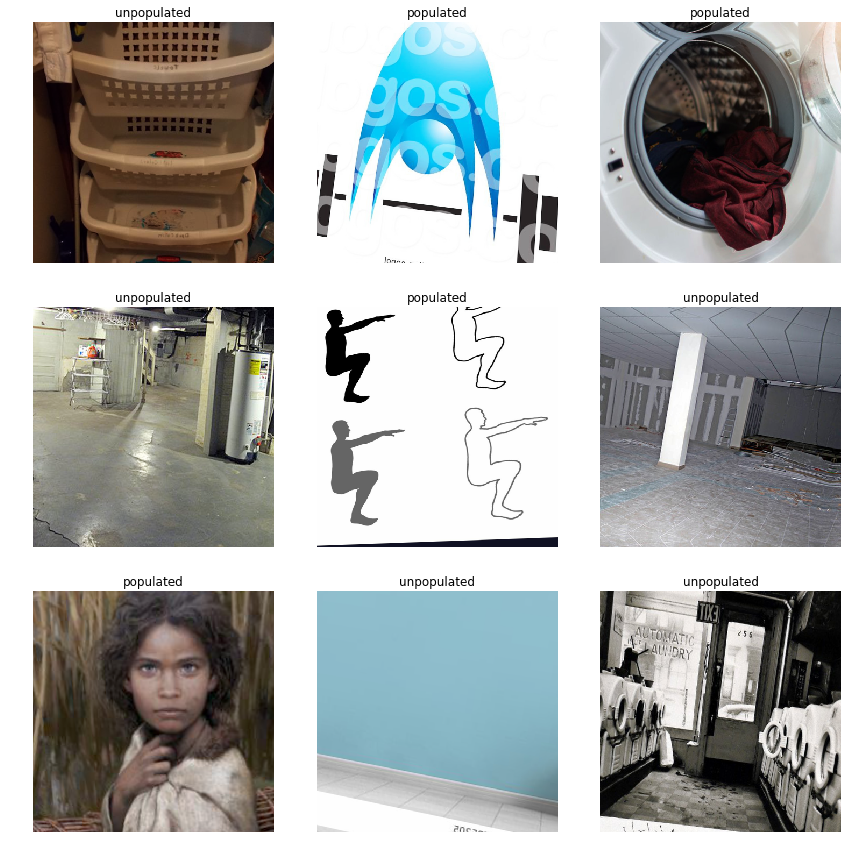

In [13]:
data2.show_batch(3, fig_size=(7,8))

In [14]:
learn2 = cnn_learner(data2, models.resnet34, metrics=error_rate)

In [15]:
learn2.load("test_1-2")
learn2.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.173694,0.122199,0.053364,01:23
1,0.163172,0.121447,0.053364,01:21
2,0.154582,0.134285,0.069606,01:20
3,0.135066,0.137119,0.064965,01:19


In [16]:
learn2.save("test_1-3")